In [1]:
from astropy.io import fits #astropy modules for FITS IO
import numpy as np #numpy gives us better array management 

In [2]:
import matplotlib  #ploting
matplotlib.use("Agg")  #some hack to stop the bouncing python icon when plotting
import matplotlib.pyplot as plt
#next line is to show plots inline with jupyter
#%matplotlib inline 
from matplotlib.colors import LogNorm #for better display of FITS images

In [3]:
%matplotlib inline

## Model Parameters

In [4]:
#Image Dimensions
xout=2048     #dispersion axis
yout=256      #spatial axis
#Simulation Parameters
snr=1000      #S/N of spectrum - move to commandline
rv=0.0        #radial velocity shift (m/s)
b=0.1         #impact parameter of planet
smodeltype=1  #1=Atlas-9+NL limbdarkening
starmodel_file="../samples/t3500l50z0_ldnl.dat" #star spectral model to use
pmodeltype=1  #1=Benneke
planetmodel_file="../samples/hd209458.csv"      #planet transit-spectral model
noversample=1 #oversampling 


In [5]:
import specgen as sp

## Get Instrument Response 

In [6]:
reponse_ld,reponse_n1,reponse_n2,reponse_n3=sp.readresponse()

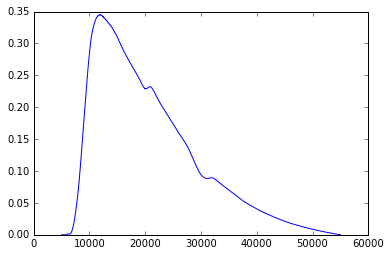

In [7]:
plt.plot(reponse_ld,reponse_n1)
plt.show()

## Read in Spectral Model

In [8]:
starmodel_wv,starmodel_flux=sp.readstarmodel(starmodel_file,smodeltype)

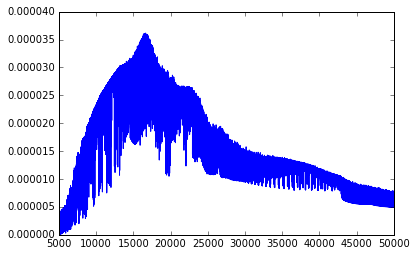

In [9]:
plt.plot(starmodel_wv,starmodel_flux)
plt.show()

In [10]:
planetmodel_wv,planetmodel_depth=sp.readplanetmodel(planetmodel_file,pmodeltype)

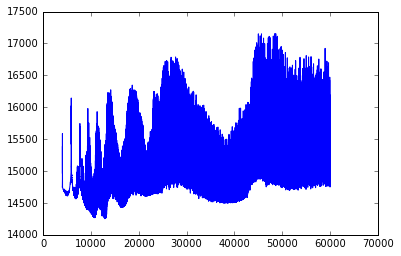

In [11]:
plt.plot(planetmodel_wv,planetmodel_depth)
plt.show()

In [12]:
sp.p2w(1,1,1)

2.60188
2.600895161
2.60089519193
2.60089519189


26008.951918913997

In [15]:
pixels=np.zeros((xout*noversample,yout*noversample))

In [20]:
pixels.shape[0]

2048

In [22]:
def addflux2pix(px,py,pixels,fmod):
    "Drizel Flux onto Pixels using a square PSF of size unity"
    
    xmax=pixels.shape[0] #Size of pixel array
    ymax=pixels.shape[1]
    
    pxmh=px-0.5 #location of reference corner of PSF square
    pymh=py=0.5
    
    dx=np.floor(px+0.5)-pxmh
    dy=np.floor(py+0.5)-pymh
    npx=int(pxmh)-1 #Numpy arrays start at zero
    npy=int(pymh)-1 
    
    if npx >= 0 and npx < xmax and npy >=0 and npy < ymax:
        pixels[npx,npy]+=fmod*(1.0-dx)*dy
        
    npx=int(pxmh)+1
    npy=int(pymh)
    if npx >= 0 and npx < xmax and npy >=0 and npy < ymax:
        pixels[npx,npy]+=fmod*dx*(1.0-dy)
        
    npx=int(pxmh)+1
    npy=int(pymh)+1
    if npx >= 0 and npx < xmax and npy >=0 and npy < ymax:
        pixels[npx,npy]+=fmod*(1.0-dx)*(1.0-dy)